In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data=pd.read_csv("depression_dataset_reddit_cleaned.csv")
data.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


<AxesSubplot:xlabel='is_depression', ylabel='count'>

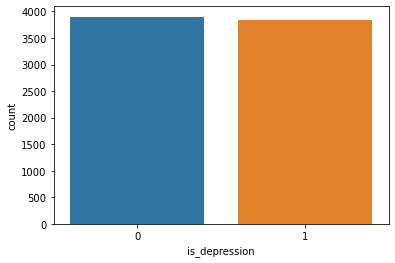

In [4]:
sns.countplot(data=data,x="is_depression")

In [5]:
import re
import nltk

In [6]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [7]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [8]:
lemmatize=nltk.WordNetLemmatizer()

In [9]:
texts=[]
for i in data.clean_text:
    text=re.sub("[^a-zA-Z]"," ",i) # it removes unalfabetic signs
    text=nltk.word_tokenize(text,language="english") # it tokenizes our words
    text=[lemmatize.lemmatize(word) for word in i] # it lemmatizes our words
    text="".join(text) # Make our tokenize into sentences
    texts.append(text) #appending to list

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count=CountVectorizer(stop_words="english",max_features=550)#it removes unnecesarry words and finds most using 550 words

In [12]:
matrix=count.fit_transform(texts).toarray() # it crates a matrix and we must transform it to a array otherwise our algorithm does not work.

In [13]:
x=matrix
y=data["is_depression"].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb=GaussianNB()

In [18]:
nb.fit(x_train,y_train)

GaussianNB()

In [19]:
nb.score(x_test,y_test)

0.9322100313479624

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,nb.predict(x_test))

array([[1228,   69],
       [ 104, 1151]], dtype=int64)